In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

In [2]:
start=datetime.datetime(2006,1,1)
end=datetime.datetime(2016,1,1)

In [3]:
bank_stocks = pd.read_pickle('all_banks')

In [4]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [5]:
tickers=['BAC','C','GS','JPM','MS','WFC']

# EDA

In [6]:
#  Let's see what is the max Close price for each bank's stock throughout the time period?

In [7]:
bank_stocks['BAC']['Close'].max()

54.9

In [10]:
# That's one way to do this
for tick in tickers:
    print(tick, bank_stocks[tick]['Close'].max())

BAC 54.9
C 564.1
GS 247.92
JPM 70.08
MS 89.3
WFC 58.52


In [11]:
# Another way to do this 
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()



Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [12]:
# An empty dataframe
returns=pd.DataFrame()

In [13]:
for tick in tickers:
    returns[tick+ ' Returns']=bank_stocks[tick]['Close'].pct_change()

In [14]:
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


In [15]:
# Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?

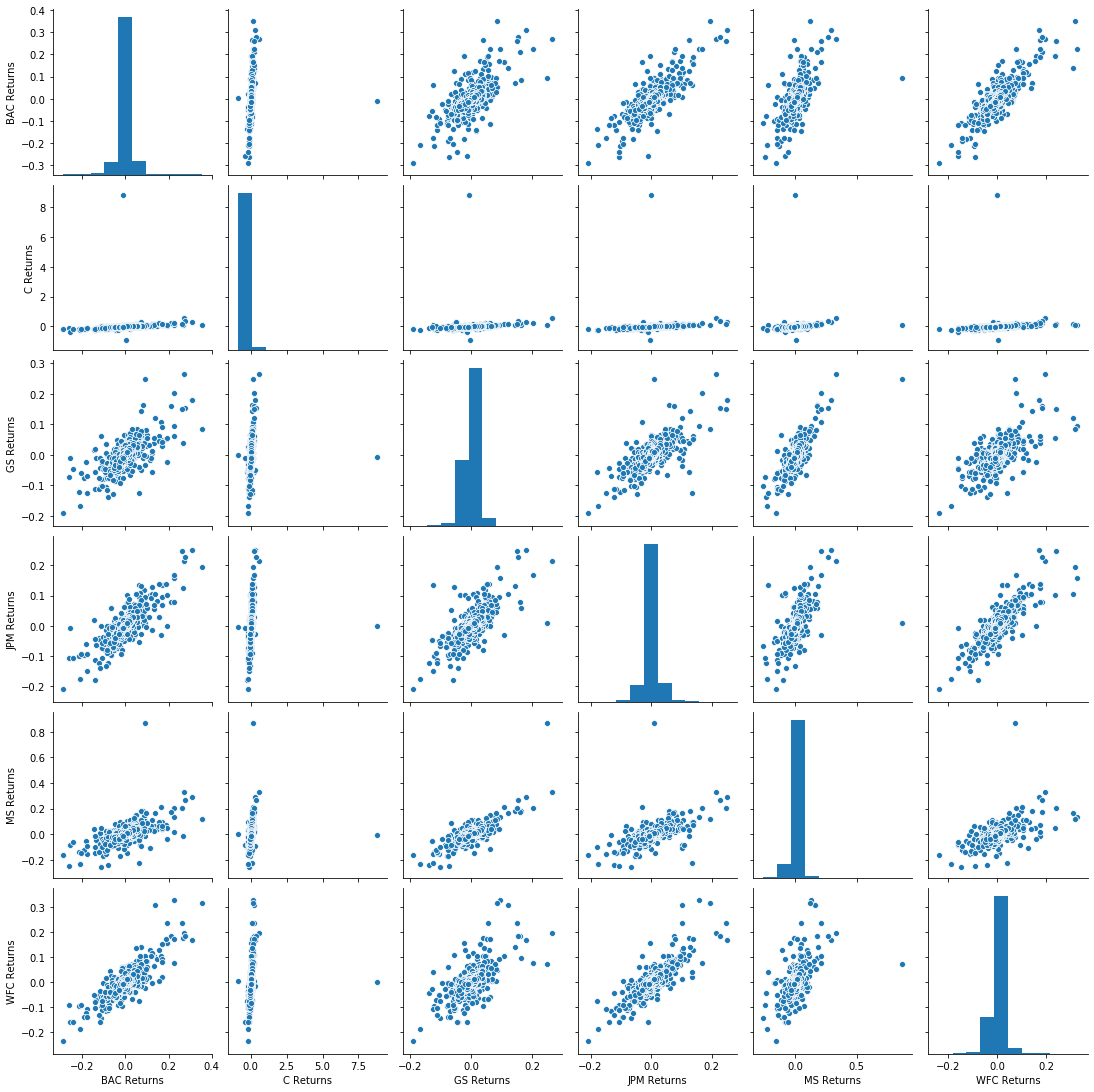

In [16]:
sns.pairplot(returns[1:])

Using this returns DataFrame, let us figure out on what dates each bank stock had the best and worst single day returns. 
Notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day- you're right - The 2008 Wall Street Stock Market crash!

In [17]:
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


In [18]:
returns.idxmin()

BAC Returns   2009-01-20
C Returns     2011-05-06
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

In [19]:
returns.idxmax()

BAC Returns   2009-04-09
C Returns     2011-05-09
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

**If we take a look at the standard deviation of the returns, we can get an idea of the riskiest stock to own, over the entire time period.**


**For example, let's check out the riskiest stock for 2015**

In [20]:
# A small value of standard deviation means your stock price is steady.
# A large stddeviation means that price goes up and down fairly often--->riskiest

returns.std()
# Notice Citi group

BAC Returns    0.036650
C Returns      0.179969
GS Returns     0.025346
JPM Returns    0.027656
MS Returns     0.037820
WFC Returns    0.030233
dtype: float64

In [21]:
# To get a slice or portion of index
returns.loc['2015-01-01':'2015-12-31'].std()

# Seems WFC was lowest risk


BAC Returns    0.016163
C Returns      0.015289
GS Returns     0.014046
JPM Returns    0.014017
MS Returns     0.016249
WFC Returns    0.012591
dtype: float64

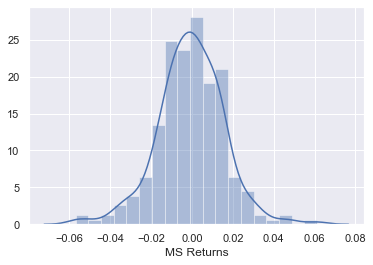

In [24]:
sns.set()
sns.distplot(returns['MS Returns'].loc['2015-01-01':'2015-12-31'])

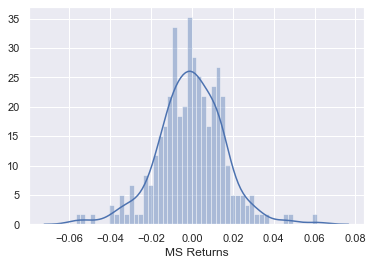

In [25]:
sns.set()
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Returns'],bins=50)

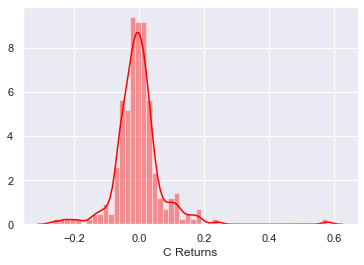

In [26]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Returns'],color='red',bins=50)

# More Visualisations

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()


In [28]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

 let's crop up a line plot showing Close price for each bank for the entire index of time. 


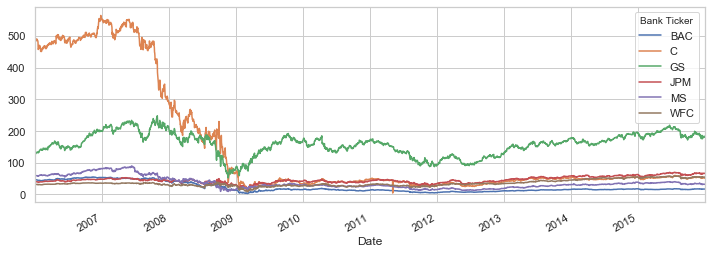

In [29]:
bank_stocks.xs(axis=1,key='Close',level='Stock Info').plot(figsize=(12,4))

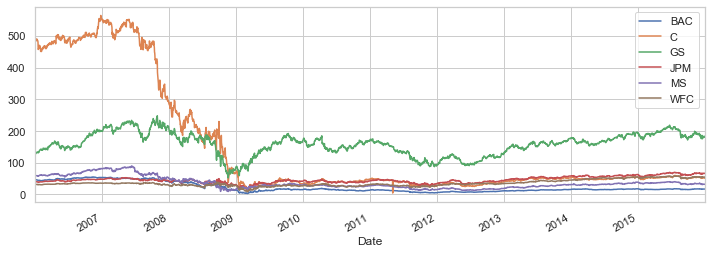

In [30]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

In [31]:
bank_stocks.xs(axis=1,key='Close',level='Stock Info').iplot()

# Github limits the rendering, do check out the nbviewer(top left button on the uploaded file) for viewing the interactive graph created via iplot

**Moving Averages**

** Le's see the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**



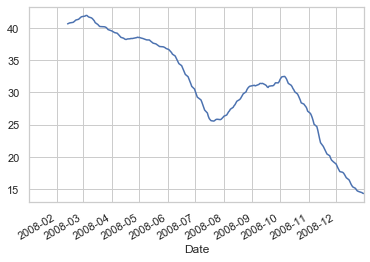

In [32]:
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot()

** Heatmap between the correlation of stocks closing price **

In [33]:
htpmap=bank_stocks.xs(axis=1,key='Close',level='Stock Info').corr()

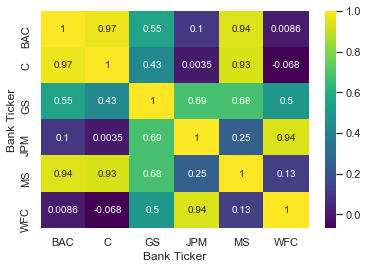

In [34]:
sns.heatmap(htpmap,cmap='viridis',annot=True)

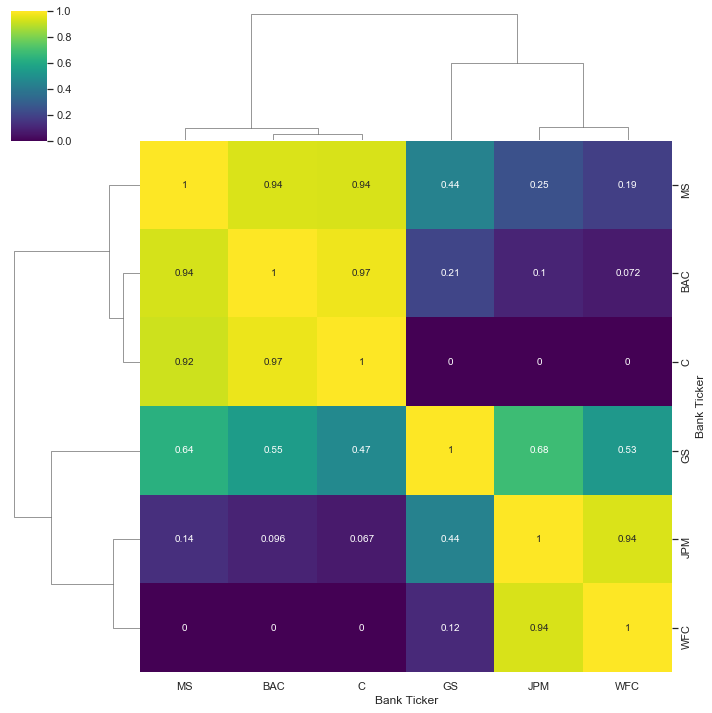

In [35]:
sns.clustermap(htpmap,standard_scale=1,cmap='viridis',annot=True)

Using iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.

In [36]:
bac15=bank_stocks['BAC'][['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']
bac15.iplot(kind='candle')

# Github limits the rendering, do check out the nbviewer(top left button on the uploaded file) for viewing the interactive graph created via iplot